In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Chocolate bar ratings 2022.csv")

In [3]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
...,...,...,...,...,...,...,...,...,...,...
2583,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [4]:
# Yenilenen satırları kaldırdık
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2588 entries, 0 to 2587
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2588 non-null   int64  
 1   Company (Manufacturer)            2588 non-null   object 
 2   Company Location                  2588 non-null   object 
 3   Review Date                       2588 non-null   int64  
 4   Country of Bean Origin            2588 non-null   object 
 5   Specific Bean Origin or Bar Name  2588 non-null   object 
 6   Cocoa Percent                     2588 non-null   object 
 7   Ingredients                       2501 non-null   object 
 8   Most Memorable Characteristics    2588 non-null   object 
 9   Rating                            2588 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 222.4+ KB


In [5]:
df.columns

Index(['REF', 'Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Ingredients', 'Most Memorable Characteristics',
       'Rating'],
      dtype='object')

In [6]:
df.describe()

,REF,Review Date,Rating
count,2588.000000,2588.000000,2588.000000
mean,1459.185471,2014.545209,3.198319
std,773.852201,4.082722,0.444069
min,5.000000,2006.000000,1.000000
25%,820.000000,2012.000000,3.000000
50%,1470.000000,2015.000000,3.250000
75%,2122.000000,2018.000000,3.500000
max,2768.000000,2022.000000,4.000000


In [7]:
#Ingredients kolonunda eksik veri var
df.isnull().any()

REF                                 False
Company (Manufacturer)              False
Company Location                    False
Review Date                         False
Country of Bean Origin              False
Specific Bean Origin or Bar Name    False
Cocoa Percent                       False
Ingredients                          True
Most Memorable Characteristics      False
Rating                              False
dtype: bool

In [8]:
# 87 tane eksik veri var
df.isnull().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [9]:
# Ingredients kolonundaki boşlukları kolonun modu ile dolduruyoruz
df.Ingredients = df.Ingredients.fillna(df[df["Ingredients"].notna()].Ingredients.mode()[0])

In [10]:
df.isnull().sum()

REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Date                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [11]:
# Cocoa Percent kolonundaki % isaretini kaldiriyoruz
df["Cocoa Percent"] = df["Cocoa Percent"].apply(lambda i: float(i[:-1]))

In [12]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,"3- B,S,C","chewy, off, rubbery",3.00
4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,"3- B,S,C","milk brownie, macadamia,chewy",3.50
...,...,...,...,...,...,...,...,...,...,...
2583,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2584,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2585,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,"3- B,S,C","fatty, earthy, cocoa",3.00
2586,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


<AxesSubplot: xlabel='Rating', ylabel='Density'>

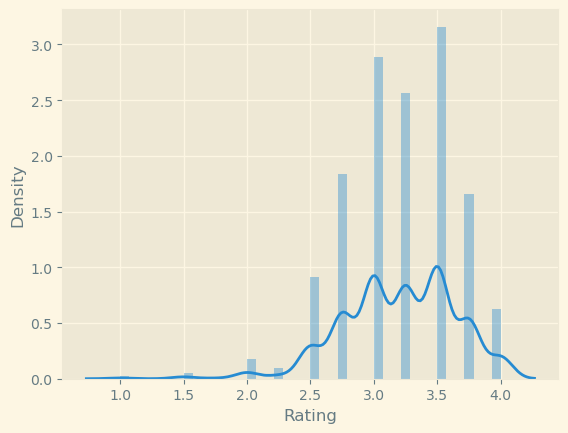

In [17]:
plt.style.use("Solarize_Light2")
sns.distplot(df.Rating)

In [24]:
#En yuksek degerlendirme
df["Rating"].max()

4.0

In [30]:
df[df["Rating"]==4.0].value_counts()

REF   Company (Manufacturer)  Company Location  Review Date  Country of Bean Origin  Specific Bean Origin or Bar Name                Cocoa Percent  Ingredients  Most Memorable Characteristics   Rating
48    Bonnat                  France            2006         Venezuela               Maracaibo, El Rosario                           75.0           3- B,S,C     creamy, fatty, floral            4.0       1
2024  Arete                   U.S.A.            2017         Bolivia                 Beniano                                         70.0           2- B,S       creamy, bright fruit             4.0       1
2016  Dick Taylor             U.S.A.            2017         Solomon Islands         Solomon Is.,batch 17158, N.Vela                 72.0           2- B,S       well defined, creamy, cherry     4.0       1
1984  Letterpress             U.S.A.            2017         Peru                    Ucayali                                         70.0           3- B,S,C     mild, licorice, coff

In [21]:
# Degerlendirmelerin betimsel istatistikleri
df["Rating"].describe()

count    2588.000000
mean        3.198319
std         0.444069
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: Rating, dtype: float64

In [41]:
# En yuksek deger alan ureticiler ve uretim yerleri
yuksek = df[["Company (Manufacturer)","Company Location","Rating"]][df["Rating"]==df["Rating"].max()]
yuksek

,Company (Manufacturer),Company Location,Rating
16,A. Morin,France,4.0
19,A. Morin,France,4.0
24,A. Morin,France,4.0
32,A. Morin,France,4.0
81,Amano,U.S.A.,4.0
...,...,...,...
2448,Valrhona,France,4.0
2451,Valrhona,France,4.0
2501,White Label aka Mutari,U.S.A.,4.0
2517,Willie's Cacao,U.K.,4.0


In [46]:
# En başarılı cikolata ureticisi ve uretim yeri
yuksek.mode()

,Company (Manufacturer),Company Location,Rating
0,Soma,U.S.A.,4.0


[Text(0.5, 1.0, 'Kakao oranlarının dağılımı')]

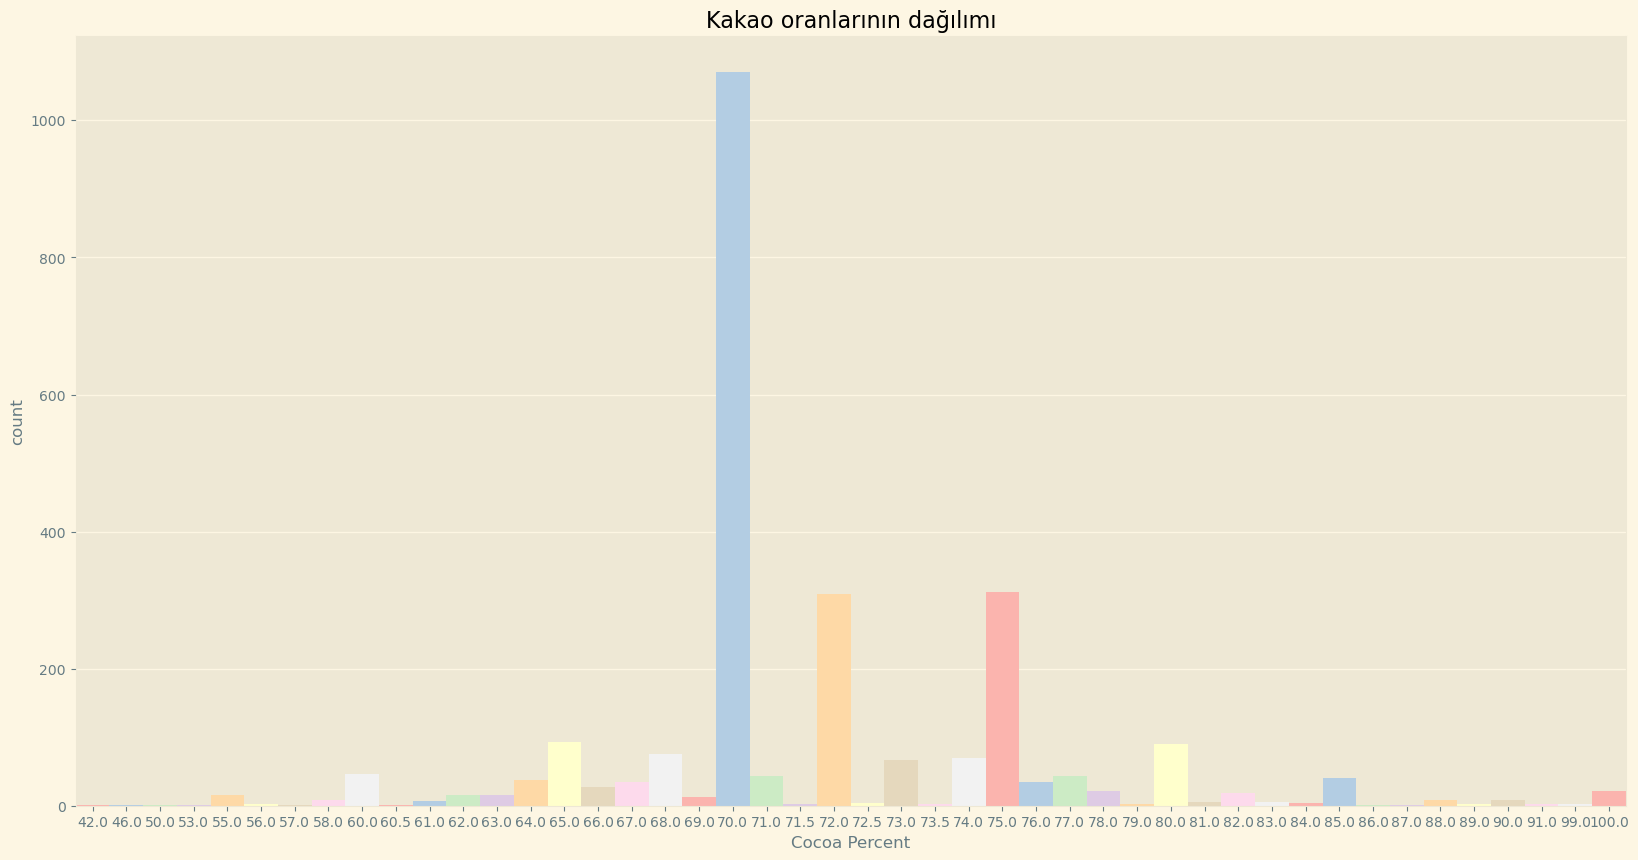

In [67]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x="Cocoa Percent", palette="Pastel1",width=1,saturation=1).set(title="Kakao oranlarının dağılımı")

<AxesSubplot: xlabel='Company Location', ylabel='count'>

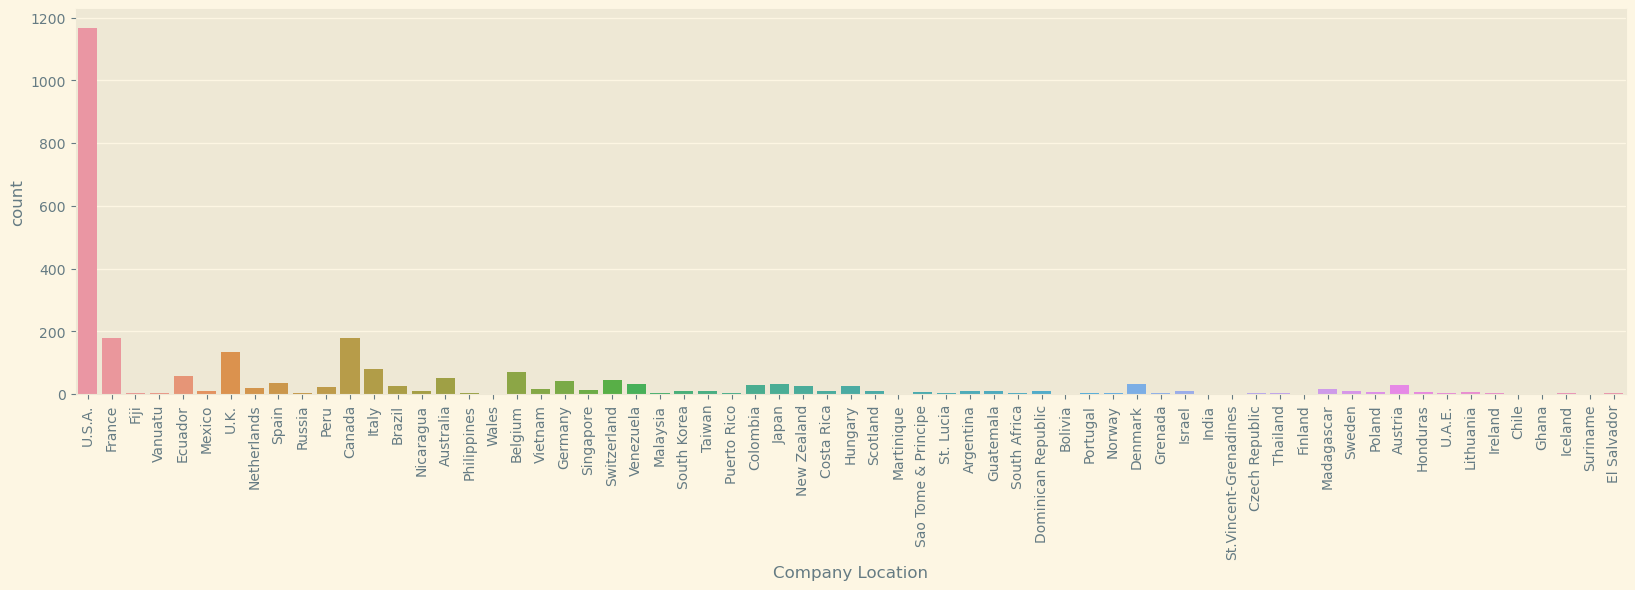

In [76]:
#Ureticilerin uretim yerlerinin dagilimi
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(data=df, x="Company Location")

<AxesSubplot: >

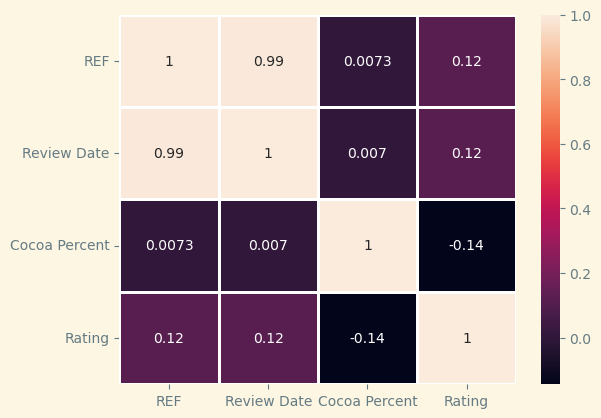

In [54]:
corr = df.corr()
sns.heatmap(corr,annot = True, linewidths = 2)